# **speed = 10 / place = 0 / place noise variance = 0.5 /speed noise variance = 0.2**

In [255]:
import numpy as np

class KalmanFilter(object):
    def __init__(self, F = None, B = None, H = None, Q = None, R = None, P = None, x0 = [[0.] , [10.]]):

        if(F is None or H is None):
            raise ValueError("Set proper system dynamics.")

        self.n = F.shape[1]
        self.m = H.shape[1]

        self.F = F
        self.H = H
        self.B = 0 if B is None else B
        self.Q = np.eye(self.n) if Q is None else Q
        self.R = np.eye(self.n) if R is None else R
        self.P = np.eye(self.n) if P is None else P
        self.x = np.zeros((self.n, 1)) if x0 is None else x0
        print(self.x , 'self.x =' , len(self.x))

    def predict(self, u = 0 ):
        self.x = np.dot(self.F, self.x) + np.dot(self.B, u)
        self.P = np.dot(np.dot(self.F, self.P), self.F.T) + self.Q
        return self.x 

    def update(self, z):
        y = z - np.dot(self.H, self.x)
        S = self.R + np.dot(self.H, np.dot(self.P, self.H.T))
        K = np.dot(np.dot(self.P, self.H.T), np.linalg.inv(S))
        self.x = self.x + np.dot(K, y)
        I = np.eye(self.n)
        self.P = np.dot(np.dot(I - np.dot(K, self.H), self.P), 
        	(I - np.dot(K, self.H)).T) + np.dot(np.dot(K, self.R), K.T)

[[0.0], [10.0]] self.x = 2
[-4.48789688e-01  7.97546575e-01 -6.03469853e-01  1.16343760e-01
 -1.30802708e-01  7.34971487e-01 -6.97427851e-01  1.01498509e+00
 -3.51399942e-01  1.31533281e-01 -1.43375167e-01 -7.70798986e-01
 -1.08519971e-03  3.50475979e-01 -1.59033264e-01 -5.44430910e-01
 -2.31500207e-01  2.15934332e-01  8.35487902e-02 -5.99273387e-01
 -5.58270314e-01 -6.70792643e-01 -2.71138328e-01 -5.34373970e-01
  1.70516943e-01 -6.43473984e-01  4.51102185e-01  2.65987885e-01
 -1.28700478e-01 -7.23434070e-01 -6.29688686e-01  5.17452688e-01
  1.44643899e-01 -1.13443830e+00 -7.40922006e-01 -4.53095287e-02
  1.65986420e-01  1.12826418e+00 -6.07645021e-01  2.36495520e-01
  3.44796952e-01 -4.56715228e-01 -4.95651173e-02  1.78817658e-01
 -2.20823533e-01 -5.71060982e-01 -4.28677723e-01  1.22943055e-01
  3.15944858e-01  3.30908884e-01 -2.36605524e-01  4.92464320e-01
 -1.22616508e+00  7.70943312e-01 -1.07865281e-01  9.35833231e-03
 -3.47619022e-01  8.80651007e-01  1.16567002e+00 -1.48853805e-0

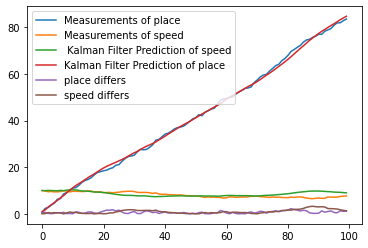

In [244]:


def example():
  dt = 0.1
  F = np.array([[1, dt], [0, 1]])
  H = np.array([1, 0]).reshape(1, 2)
  Q = np.array([[0.25 * (dt **4) * 0.5, 0.5 * (dt**3) * 0.5], [ 0.5 * (dt**3) * 0.5 , 0.5*(dt**2)]])
  R = np.array([0.5]).reshape(1, 1)
  newmesuer = [ 0 , 10]
  kf = KalmanFilter(F = F, H = H, Q = Q, R = R)
  predictions_place = []
  predictions_speed = []
  measurementsofplace = []
  measurementsofspeed = []
  noise1 =np.random.normal(0, 0.5, 100)
  print(noise1)
  noise2 = np.random.normal(0, 0.2, 100)
  for k in range(100):
    newmesuer = np.dot(F, newmesuer) + [noise1[k] , noise2[k]]
    print(newmesuer)
    measurementsofplace.append(newmesuer[0])
    measurementsofspeed.append(newmesuer[1])
  

  for z in measurementsofplace:
    a = kf.predict()
    place = a[0][0] 
    speed = a[1]
    predictions_place.append(np.dot(H, a)[0])
    predictions_speed.append(speed)
    kf.update(z)
  difference  = np.abs( measurementsofplace - np.ravel(predictions_place))
  difference2 = np.abs( measurementsofspeed - np.ravel(predictions_speed))
  print( 'PLACE diifer is :' , difference)
  print('speed differ is : ' ,difference2 )
  import matplotlib.pyplot as plt
  plt.plot(range(len(measurementsofplace)), measurementsofplace, label = 'Measurements of place')
  plt.plot(range(len(measurementsofspeed)), measurementsofspeed, label = 'Measurements of speed')
  plt.plot(range(len(predictions_speed)), predictions_speed, label = ' Kalman Filter Prediction of speed')
  plt.plot(range(len(predictions_place)), np.ravel(predictions_place), label = 'Kalman Filter Prediction of place')
  plt.plot(range(len(difference)), difference, label = 'place differs')
  plt.plot(range(len(difference2)), difference2, label = 'speed differs')

  plt.legend()
  plt.show()


if __name__ == '__main__':
    example()

# **speed = 10 / place = 0 / place noise variance = 0.5 /speed noise variance = 1**

[[0.0], [10.0]] self.x = 2
[ 0.44579748 -0.75544696 -0.869117    0.63717574  0.53565108  0.30818006
  0.41523857 -0.09057572 -0.47633613  0.43168825  0.01891863 -0.1059788
  0.0962772   0.9919364  -0.01453035  0.50809956 -0.41003848  0.33945839
  0.20317016 -0.47347915  0.80511364  0.04769664  0.9286276  -0.21574616
 -0.04818281  0.0837582  -0.57119924  0.57368523  0.08329819  0.16266934
 -0.59198505  0.18017689  0.14299671 -0.9726957  -0.4442105   0.15206791
 -0.22271439 -0.77784481 -0.26907538  0.65612504 -0.33322388 -0.50571755
  0.4334478   1.24414699  0.57102076 -0.37721851  0.45854922 -0.32042119
 -0.36790573 -0.14142585  0.02814016 -0.23396264 -0.45213495 -0.58736632
  0.21925592 -0.18871889  0.19314888 -0.61033609  0.19008831 -0.47527439
  0.53783414 -1.0835557   0.57143162  0.11803887  0.82265269  0.14478725
  0.22572706 -0.32582406  0.19750119 -0.15955645 -0.49068587 -0.63105831
  0.19206071  0.31791396 -0.88592606 -1.26037826 -0.12306873 -0.53198808
 -0.31332338 -0.42237928 

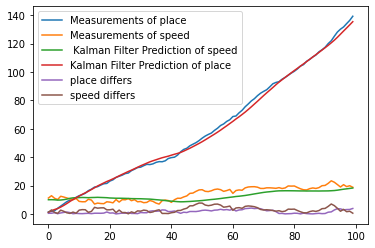

In [245]:
def example():
  dt = 0.1
  F = np.array([[1, dt], [0, 1]])
  H = np.array([1, 0]).reshape(1, 2)
  Q = np.array([[0.25 * (dt **4) * 0.5, 0.5 * (dt**3) * 0.5], [ 0.5 * (dt**3) * 0.5 , 0.5*(dt**2)]])
  R = np.array([0.5]).reshape(1, 1)
  newmesuer = [ 0 , 10]
  kf = KalmanFilter(F = F, H = H, Q = Q, R = R)
  predictions_place = []
  predictions_speed = []
  measurementsofplace = []
  measurementsofspeed = []
  noise1 =np.random.normal(0, 0.5, 100)
  print(noise1)
  noise2 = np.random.normal(0, 1, 100)
  for k in range(100):
    newmesuer = np.dot(F, newmesuer) + [noise1[k] , noise2[k]]
    print(newmesuer)
    measurementsofplace.append(newmesuer[0])
    measurementsofspeed.append(newmesuer[1])
  

  for z in measurementsofplace:
    a = kf.predict()
    place = a[0][0] 
    speed = a[1]
    predictions_place.append(np.dot(H, a)[0])
    predictions_speed.append(speed)
    kf.update(z)
  difference  = np.abs( measurementsofplace - np.ravel(predictions_place))
  difference2 = np.abs( measurementsofspeed - np.ravel(predictions_speed))
  print( 'PLACE diifer is :' , difference)
  print('speed differ is : ' ,difference2 )
  print('kal' , predictions_speed)
  import matplotlib.pyplot as plt
  plt.plot(range(len(measurementsofplace)), measurementsofplace, label = 'Measurements of place')
  plt.plot(range(len(measurementsofspeed)), measurementsofspeed, label = 'Measurements of speed')
  plt.plot(range(len(predictions_speed)), predictions_speed, label = ' Kalman Filter Prediction of speed')
  plt.plot(range(len(predictions_place)), np.ravel(predictions_place), label = 'Kalman Filter Prediction of place')
  plt.plot(range(len(difference)), difference, label = 'place differs')
  plt.plot(range(len(difference2)), difference2, label = 'speed differs')

  plt.legend()
  plt.show()


if __name__ == '__main__':
    example()

# **speed = 10 / place = 0 / place noise variance = 0.5 /speed noise variance = 0.01**

[[0.0], [10.0]] self.x = 2
[ 0.35359004 -0.30520938  0.75392527  0.00359127 -0.09306531  0.80447755
 -0.16650411  0.02093091 -0.41965821 -0.15862903 -0.023778   -0.145712
  0.00984412  0.19509387  0.74708804  0.44451752 -0.72261595  0.54724646
 -0.00439039 -0.29557178 -0.03103499 -0.04804979  1.07346507 -0.39024705
 -0.18505225  0.01174157 -0.45966943  1.08054288 -1.00446693  0.42750597
  0.04744418  0.34465209  0.33210638 -0.61166251  0.03156879 -0.20605556
 -0.37413823  0.20467791 -0.24781805  0.57415903  0.43236195  0.20276427
  0.19875332 -0.12414256 -0.65264394 -0.56828254  0.49755525 -0.44912128
  0.23192252  0.95228245 -0.25129623 -0.59368063  0.01599273  0.60644833
  0.27490075 -0.66295931 -0.29754225 -0.78060599  0.5108152  -0.2008032
  0.16831341 -0.11585812  0.0391094  -0.34390594 -0.28238742  0.42669696
 -0.08265021  0.12326477  0.20238459  0.59193451  0.37762212  0.17863625
  0.18641272  0.65421956 -0.23471693 -0.32831524  0.07564872  1.36120691
 -0.21382002 -0.14014583 -0

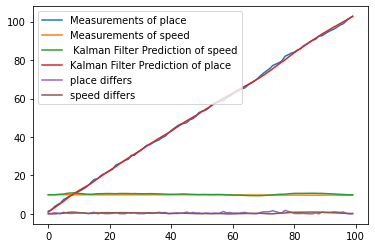

In [246]:
def example():
  dt = 0.1
  F = np.array([[1, dt], [0, 1]])
  H = np.array([1, 0]).reshape(1, 2)
  Q = np.array([[0.25 * (dt **4) * 0.5, 0.5 * (dt**3) * 0.5], [ 0.5 * (dt**3) * 0.5 , 0.5*(dt**2)]])
  R = np.array([0.5]).reshape(1, 1)
  newmesuer = [ 0 , 10]
  kf = KalmanFilter(F = F, H = H, Q = Q, R = R)
  predictions_place = []
  predictions_speed = []
  measurementsofplace = []
  measurementsofspeed = []
  noise1 =np.random.normal(0, 0.5, 100)
  print(noise1)
  noise2 = np.random.normal(0, 0.01, 100)
  for k in range(100):
    newmesuer = np.dot(F, newmesuer) + [noise1[k] , noise2[k]]
    print(newmesuer)
    measurementsofplace.append(newmesuer[0])
    measurementsofspeed.append(newmesuer[1])
  

  for z in measurementsofplace:
    a = kf.predict()
    place = a[0][0] 
    speed = a[1]
    predictions_place.append(np.dot(H, a)[0])
    predictions_speed.append(speed)
    kf.update(z)
  difference  = np.abs( measurementsofplace - np.ravel(predictions_place))
  difference2 = np.abs( measurementsofspeed - np.ravel(predictions_speed))
  print( 'PLACE diifer is :' , difference)
  print('speed differ is : ' ,difference2 )
  print('kal' , predictions_speed)
  import matplotlib.pyplot as plt
  plt.plot(range(len(measurementsofplace)), measurementsofplace, label = 'Measurements of place')
  plt.plot(range(len(measurementsofspeed)), measurementsofspeed, label = 'Measurements of speed')
  plt.plot(range(len(predictions_speed)), predictions_speed, label = ' Kalman Filter Prediction of speed')
  plt.plot(range(len(predictions_place)), np.ravel(predictions_place), label = 'Kalman Filter Prediction of place')
  plt.plot(range(len(difference)), difference, label = 'place differs')
  plt.plot(range(len(difference2)), difference2, label = 'speed differs')

  plt.legend()
  plt.show()


if __name__ == '__main__':
    example()

# **speed = 10 / place = 0 / place noise variance = 0.2 /speed noise variance = 2**

[[0.0], [10.0]] self.x = 2
[ 0.46610336  0.12377995  0.01686331  0.17089747 -0.3458618  -0.75261024
 -0.53033083  1.0206743   0.16767302  0.37675421  0.28453278 -0.43148682
  0.44079584 -1.08222289 -0.07072351  0.23688763  0.73638359 -0.36699811
  0.5873333   0.7968875   0.35806273  0.48006994 -0.32480894 -0.36166439
  1.14099312  0.1755651  -0.20414102 -0.20404454 -0.16197942 -0.39233334
 -0.35411261 -0.4274608   0.2388396   0.53671332  0.25102388 -0.0097733
 -1.20942214  0.10245873 -0.19366919  0.19391359 -0.88273695  0.14414389
  0.35435027 -0.22907919  0.07404214 -0.45204757 -0.30366877 -0.43993168
  0.12413884  0.35513957 -0.59163696  0.75393121 -0.10987107 -0.48914805
  0.7460697   0.40662012 -0.0092637   0.82667751  0.13616791 -0.64694775
  0.2442633   0.72158174  0.18216282  0.28111335 -0.22851305  0.06383219
 -0.15809681 -0.104523   -0.21239136 -0.66019653  0.30994226  0.81563483
  0.81767111  0.12989278  0.10095981 -0.15745231  0.16330395 -0.41168028
 -0.61492097  0.37590818 

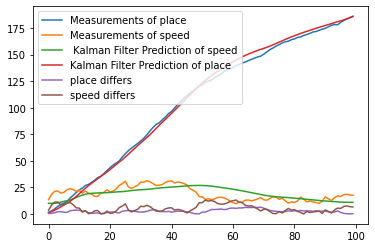

In [256]:
def example():
  dt = 0.1
  F = np.array([[1, dt], [0, 1]])
  H = np.array([1, 0]).reshape(1, 2)
  Q = np.array([[0.25 * (dt **4) * 0.5, 0.5 * (dt**3) * 0.5], [ 0.5 * (dt**3) * 0.5 , 0.5*(dt**2)]])
  R = np.array([0.5]).reshape(1, 1)
  newmesuer = [ 0 , 10]
  kf = KalmanFilter(F = F, H = H, Q = Q, R = R)
  predictions_place = []
  predictions_speed = []
  measurementsofplace = []
  measurementsofspeed = []
  noise1 =np.random.normal(0, 0.5, 100)
  print(noise1)
  noise2 = np.random.normal(0, 2, 100)
  for k in range(100):
    newmesuer = np.dot(F, newmesuer) + [noise1[k] , noise2[k]]
    print(newmesuer)
    measurementsofplace.append(newmesuer[0])
    measurementsofspeed.append(newmesuer[1])
  

  for z in measurementsofplace:
    a = kf.predict()
    place = a[0][0] 
    speed = a[1]
    predictions_place.append(np.dot(H, a)[0])
    predictions_speed.append(speed)
    kf.update(z)
  difference  = np.abs( measurementsofplace - np.ravel(predictions_place))
  difference2 = np.abs( measurementsofspeed - np.ravel(predictions_speed))
  print( 'PLACE diifer is :' , difference)
  print('speed differ is : ' ,difference2 )
  print('kal' , predictions_speed)
  import matplotlib.pyplot as plt
  plt.plot(range(len(measurementsofplace)), measurementsofplace, label = 'Measurements of place')
  plt.plot(range(len(measurementsofspeed)), measurementsofspeed, label = 'Measurements of speed')
  plt.plot(range(len(predictions_speed)), predictions_speed, label = ' Kalman Filter Prediction of speed')
  plt.plot(range(len(predictions_place)), np.ravel(predictions_place), label = 'Kalman Filter Prediction of place')
  plt.plot(range(len(difference)), difference, label = 'place differs')
  plt.plot(range(len(difference2)), difference2, label = 'speed differs')

  plt.legend()
  plt.show()


if __name__ == '__main__':
    example()

# **speed = 10 / place = 0 / place noise variance = 0.1 /speed noise variance = 1**

[[0.0], [10.0]] self.x = 2
[-0.08784423 -0.06174067 -0.31434648 -0.21922637  0.03405842 -0.0879225
  0.00225236  0.19096576 -0.04409718  0.00712554 -0.06923846 -0.12793496
 -0.03692455  0.13250857 -0.20072798 -0.00207891  0.00569805 -0.1188997
  0.04152991 -0.01686015 -0.04790698  0.11543697  0.0746405   0.16042949
 -0.03645661  0.14105384  0.07844588  0.06771728 -0.09446038 -0.13282438
 -0.11335033  0.11583793 -0.08951053  0.01264463 -0.06345171 -0.00634319
 -0.06035949 -0.03965439 -0.15226722  0.11166245  0.02012044 -0.01907634
 -0.05352994  0.00850724 -0.08919258  0.12718658  0.21720771  0.0447675
 -0.10685889  0.04491313 -0.03612286 -0.02103522 -0.17102282 -0.0519868
 -0.13444271 -0.02249761  0.03206389  0.03763396 -0.13958412 -0.01250438
  0.13497607  0.18699418 -0.16541859 -0.0237872   0.08662234  0.11495822
 -0.03312869  0.05309629 -0.05403396  0.15540065 -0.14291979  0.08442575
 -0.16066612 -0.11195072 -0.10628651  0.11436741 -0.0111235  -0.10963958
 -0.02308176 -0.01343408 -0.

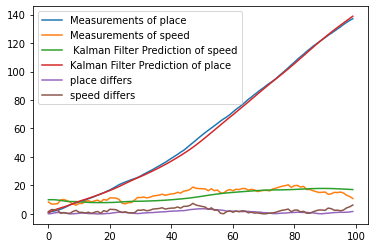

In [249]:
def example():
  dt = 0.1
  F = np.array([[1, dt], [0, 1]])
  H = np.array([1, 0]).reshape(1, 2)
  Q = np.array([[0.25 * (dt **4) * 0.5, 0.5 * (dt**3) * 0.5], [ 0.5 * (dt**3) * 0.5 , 0.5*(dt**2)]])
  R = np.array([0.5]).reshape(1, 1)
  newmesuer = [ 0 , 10]
  kf = KalmanFilter(F = F, H = H, Q = Q, R = R)
  predictions_place = []
  predictions_speed = []
  measurementsofplace = []
  measurementsofspeed = []
  noise1 =np.random.normal(0, 0.1, 100)
  print(noise1)
  noise2 = np.random.normal(0, 1, 100)
  for k in range(100):
    newmesuer = np.dot(F, newmesuer) + [noise1[k] , noise2[k]]
    print(newmesuer)
    measurementsofplace.append(newmesuer[0])
    measurementsofspeed.append(newmesuer[1])
  

  for z in measurementsofplace:
    a = kf.predict()
    place = a[0][0] 
    speed = a[1]
    predictions_place.append(np.dot(H, a)[0])
    predictions_speed.append(speed)
    kf.update(z)
  difference  = np.abs( measurementsofplace - np.ravel(predictions_place))
  difference2 = np.abs( measurementsofspeed - np.ravel(predictions_speed))
  print( 'PLACE diifer is :' , difference)
  print('speed differ is : ' ,difference2 )
  print('kal' , predictions_speed)
  import matplotlib.pyplot as plt
  plt.plot(range(len(measurementsofplace)), measurementsofplace, label = 'Measurements of place')
  plt.plot(range(len(measurementsofspeed)), measurementsofspeed, label = 'Measurements of speed')
  plt.plot(range(len(predictions_speed)), predictions_speed, label = ' Kalman Filter Prediction of speed')
  plt.plot(range(len(predictions_place)), np.ravel(predictions_place), label = 'Kalman Filter Prediction of place')
  plt.plot(range(len(difference)), difference, label = 'place differs')
  plt.plot(range(len(difference2)), difference2, label = 'speed differs')

  plt.legend()
  plt.show()


if __name__ == '__main__':
    example()

# **speed = 10 / place = 0 / place noise variance = 1 /speed noise variance = 4**

[[0.0], [10.0]] self.x = 2
[ 0.08977279 -0.73227563  0.19670593 -0.41819295  0.44888818 -0.08140096
 -1.1388715  -0.72498817 -0.59798941  0.5315015   0.85029539  0.18461945
  0.36473954  0.9190507  -1.35158736 -0.12594088 -0.54557323  1.40009739
  0.1263532   0.12547016  0.06331968 -1.25443424 -1.27102891  0.48516719
 -0.6711416   0.7482745  -2.06646457  0.20081805 -1.21673574  0.38569751
  0.9898433   0.06005656 -0.8682271  -0.40997884 -0.2446458   0.42289798
  0.56575404  0.6246542  -0.28114142 -1.13712933  0.35281813 -1.27303142
 -0.07914586 -0.62529215 -1.79989056  0.77487564 -0.42407001  0.01877381
 -2.18615538 -0.70490166 -0.59895573 -2.1613555  -0.4673094  -0.32843015
  0.12326064  0.21372688 -1.31766313  0.79889882  0.38563024  1.17856472
 -0.16935552  2.93965968 -1.44816235  0.57669818 -1.19862644  0.60317285
  1.43804354 -0.3025195  -0.94069653  1.57179748  0.69731534 -0.66898801
 -0.77697231  0.81153751 -0.19527906  1.94440723 -0.43509246 -0.63690924
 -0.79565808  0.94377749

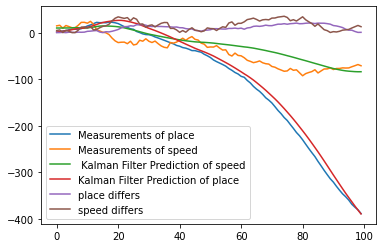

In [263]:
def example():
  dt = 0.1
  F = np.array([[1, dt], [0, 1]])
  H = np.array([1, 0]).reshape(1, 2)
  Q = np.array([[0.25 * (dt **4) * 0.5, 0.5 * (dt**3) * 0.5], [ 0.5 * (dt**3) * 0.5 , 0.5*(dt**2)]])
  R = np.array([0.5]).reshape(1, 1)
  newmesuer = [ 0 , 10]
  kf = KalmanFilter(F = F, H = H, Q = Q, R = R)
  predictions_place = []
  predictions_speed = []
  measurementsofplace = []
  measurementsofspeed = []
  noise1 =np.random.normal(0, 1, 100)
  print(noise1)
  noise2 = np.random.normal(0, 4, 100)
  for k in range(100):
    newmesuer = np.dot(F, newmesuer) + [noise1[k] , noise2[k]]
    print(newmesuer)
    measurementsofplace.append(newmesuer[0])
    measurementsofspeed.append(newmesuer[1])
  

  for z in measurementsofplace:
    a = kf.predict()
    place = a[0][0] 
    speed = a[1]
    predictions_place.append(np.dot(H, a)[0])
    predictions_speed.append(speed)
    kf.update(z)
  difference  = np.abs( measurementsofplace - np.ravel(predictions_place))
  difference2 = np.abs( measurementsofspeed -np.ravel(predictions_speed))
  print( 'PLACE diifer is :' , difference)
  print('speed differ is : ' ,difference2 )
  import matplotlib.pyplot as plt
  plt.plot(range(len(measurementsofplace)), measurementsofplace, label = 'Measurements of place')
  plt.plot(range(len(measurementsofspeed)), measurementsofspeed, label = 'Measurements of speed')
  plt.plot(range(len(predictions_speed)), predictions_speed, label = ' Kalman Filter Prediction of speed')
  plt.plot(range(len(predictions_place)), np.ravel(predictions_place), label = 'Kalman Filter Prediction of place')
  plt.plot(range(len(difference)), difference, label = 'place differs')
  plt.plot(range(len(difference2)), difference2, label = 'speed differs')

  plt.legend()
  plt.show()


if __name__ == '__main__':
    example()

# **speed = 10 / place = 0 / place noise variance = 0.1 /speed noise variance = 0.1**

[[0.0], [10.0]] self.x = 2
[-0.11369438 -0.09482679 -0.00851495  0.03351305  0.02923873 -0.04399778
  0.03320088 -0.03704252 -0.05002346  0.05059734 -0.13225952 -0.03392913
  0.0624103  -0.07562436  0.01791751  0.12959504  0.15176805  0.19733169
 -0.01133503  0.03548799  0.06006868  0.23034674  0.0561964   0.0506674
 -0.09725447 -0.15851585 -0.02652193 -0.12047879 -0.09865388  0.04352984
 -0.05887175 -0.19871888  0.05304951 -0.18688575 -0.04042638 -0.1434346
  0.20865801  0.1849104  -0.13945803  0.00251583 -0.12732715  0.02941611
  0.28592093  0.03929285 -0.08719096  0.19304245 -0.21958476 -0.07747282
  0.01034493  0.09159336 -0.158369   -0.02680924  0.01858498  0.10109745
  0.00119088  0.07956223 -0.13255943 -0.08564917 -0.06426625 -0.15642158
 -0.11127058  0.06440627 -0.09775825 -0.10888471 -0.08550073 -0.09260449
  0.00986041 -0.04324842 -0.13595201 -0.00699237  0.15510954 -0.04824515
 -0.02467166 -0.18917326  0.02600676  0.10450939 -0.00103444 -0.04674965
 -0.05921682  0.18551811  

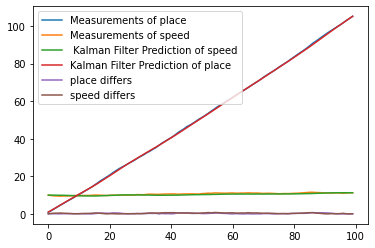

In [252]:
def example():
  dt = 0.1
  F = np.array([[1, dt], [0, 1]])
  H = np.array([1, 0]).reshape(1, 2)
  Q = np.array([[0.25 * (dt **4) * 0.5, 0.5 * (dt**3) * 0.5], [ 0.5 * (dt**3) * 0.5 , 0.5*(dt**2)]])
  R = np.array([0.5]).reshape(1, 1)
  newmesuer = [ 0 , 10]
  kf = KalmanFilter(F = F, H = H, Q = Q, R = R)
  predictions_place = []
  predictions_speed = []
  measurementsofplace = []
  measurementsofspeed = []
  noise1 =np.random.normal(0, 0.1, 100)
  print(noise1)
  noise2 = np.random.normal(0, 0.1, 100)
  for k in range(100):
    newmesuer = np.dot(F, newmesuer) + [noise1[k] , noise2[k]]
    print(newmesuer)
    measurementsofplace.append(newmesuer[0])
    measurementsofspeed.append(newmesuer[1])
  

  for z in measurementsofplace:
    a = kf.predict()
    place = a[0][0] 
    speed = a[1]
    predictions_place.append(np.dot(H, a)[0])
    predictions_speed.append(speed)
    kf.update(z)
  difference  = np.abs( measurementsofplace - np.ravel(predictions_place))
  difference2 = np.abs( measurementsofspeed - np.ravel(predictions_speed))
  print( 'PLACE diifer is :' , difference)
  print('speed differ is : ' ,difference2 )
  import matplotlib.pyplot as plt
  plt.plot(range(len(measurementsofplace)), measurementsofplace, label = 'Measurements of place')
  plt.plot(range(len(measurementsofspeed)), measurementsofspeed, label = 'Measurements of speed')
  plt.plot(range(len(predictions_speed)), predictions_speed, label = ' Kalman Filter Prediction of speed')
  plt.plot(range(len(predictions_place)), np.ravel(predictions_place), label = 'Kalman Filter Prediction of place')
  plt.plot(range(len(difference)), difference, label = 'place differs')
  plt.plot(range(len(difference2)), difference2, label = 'speed differs')

  plt.legend()
  plt.show()


if __name__ == '__main__':
    example()

# **different places**

[[100.0], [10.0]] self.x = 2
[-0.09535111  0.02214632 -0.12987009 -0.0377632   0.02781327  0.017735
  0.17427899  0.18756237 -0.01936496  0.05434193  0.08912114  0.06416859
  0.00845888 -0.04148258 -0.22559027  0.04518074  0.12229587  0.11790073
  0.02168567  0.04614255  0.11826011 -0.08161966  0.06190444  0.00054917
 -0.02363693  0.0029914  -0.13062887 -0.13787402  0.04844197  0.17748918
 -0.06700506  0.00191921  0.01826509 -0.07038913 -0.05530273 -0.01059184
  0.06558083  0.05533563  0.06028768 -0.01924661 -0.24946637  0.08611468
 -0.01570795  0.01799884 -0.05240113  0.02494264  0.04921998 -0.22401514
  0.06676589 -0.08085251 -0.03099355 -0.06082995 -0.11452327  0.03012306
 -0.00583949 -0.25312799  0.10311927  0.00647893  0.10187775 -0.0455698
 -0.14035394  0.1651778  -0.06277273  0.08725977  0.05188206 -0.02607665
  0.13838466 -0.01234217 -0.00249496  0.01343231  0.09609452 -0.18567634
 -0.09189938  0.05565735  0.11899514  0.10198616 -0.06636455 -0.22803634
  0.02977692 -0.06569843 

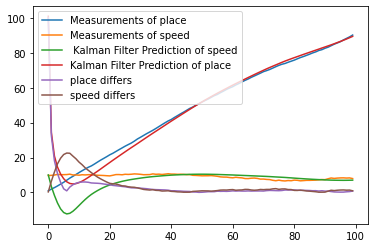

In [253]:
import numpy as np

class KalmanFilter(object):
    def __init__(self, F = None, B = None, H = None, Q = None, R = None, P = None, x0 = [[100.] , [10.]]):

        if(F is None or H is None):
            raise ValueError("Set proper system dynamics.")

        self.n = F.shape[1]
        self.m = H.shape[1]

        self.F = F
        self.H = H
        self.B = 0 if B is None else B
        self.Q = np.eye(self.n) if Q is None else Q
        self.R = np.eye(self.n) if R is None else R
        self.P = np.eye(self.n) if P is None else P
        self.x = np.zeros((self.n, 1)) if x0 is None else x0
        print(self.x , 'self.x =' , len(self.x))

    def predict(self, u = 0 ):
        self.x = np.dot(self.F, self.x) + np.dot(self.B, u)
        self.P = np.dot(np.dot(self.F, self.P), self.F.T) + self.Q
        return self.x 

    def update(self, z):
        y = z - np.dot(self.H, self.x)
        S = self.R + np.dot(self.H, np.dot(self.P, self.H.T))
        K = np.dot(np.dot(self.P, self.H.T), np.linalg.inv(S))
        self.x = self.x + np.dot(K, y)
        I = np.eye(self.n)
        self.P = np.dot(np.dot(I - np.dot(K, self.H), self.P), 
        	(I - np.dot(K, self.H)).T) + np.dot(np.dot(K, self.R), K.T)
def example():
  dt = 0.1
  F = np.array([[1, dt], [0, 1]])
  H = np.array([1, 0]).reshape(1, 2)
  Q = np.array([[0.25 * (dt **4) * 0.5, 0.5 * (dt**3) * 0.5], [ 0.5 * (dt**3) * 0.5 , 0.5*(dt**2)]])
  R = np.array([0.5]).reshape(1, 1)
  newmesuer = [ 0 , 10]
  kf = KalmanFilter(F = F, H = H, Q = Q, R = R)
  predictions_place = []
  predictions_speed = []
  measurementsofplace = []
  measurementsofspeed = []
  noise1 =np.random.normal(0, 0.1, 100)
  print(noise1)
  noise2 = np.random.normal(0, 0.2, 100)
  for k in range(100):
    newmesuer = np.dot(F, newmesuer) + [noise1[k] , noise2[k]]
    print(newmesuer)
    measurementsofplace.append(newmesuer[0])
    measurementsofspeed.append(newmesuer[1])
  

  for z in measurementsofplace:
    a = kf.predict()
    place = a[0][0] 
    speed = a[1]
    predictions_place.append(np.dot(H, a)[0])
    predictions_speed.append(speed)
    kf.update(z)
  difference  = np.abs( measurementsofplace - np.ravel(predictions_place))
  difference2 = np.abs( measurementsofspeed - np.ravel(predictions_speed))
  print( 'PLACE diifer is :' , difference)
  print('speed differ is : ' ,difference2 )
  import matplotlib.pyplot as plt
  plt.plot(range(len(measurementsofplace)), measurementsofplace, label = 'Measurements of place')
  plt.plot(range(len(measurementsofspeed)), measurementsofspeed, label = 'Measurements of speed')
  plt.plot(range(len(predictions_speed)), predictions_speed, label = ' Kalman Filter Prediction of speed')
  plt.plot(range(len(predictions_place)), np.ravel(predictions_place), label = 'Kalman Filter Prediction of place')
  plt.plot(range(len(difference)), difference, label = 'place differs')
  plt.plot(range(len(difference2)), difference2, label = 'speed differs')

  plt.legend()
  plt.show()


if __name__ == '__main__':
    example()

# **different speeds**

[[0.0], [60.0]] self.x = 2
[-0.1044656  -0.13855902 -0.03824762  0.27959307  0.14860237  0.0327072
 -0.08906287  0.09219321  0.07837782 -0.17999929 -0.1694102  -0.09368139
  0.10885904  0.08870001 -0.05521298  0.24754165  0.08234501 -0.04836727
 -0.04896235  0.06498985  0.10398914 -0.02016089 -0.11518141 -0.075891
 -0.04407655 -0.16861933  0.21163255  0.03543217 -0.24846701  0.18857894
  0.02940024 -0.09738816 -0.14242126  0.14355619 -0.1361003  -0.00471135
 -0.00090828  0.00189892 -0.16758168  0.05610941 -0.03986166 -0.06663173
  0.03910646 -0.03224031  0.00857881  0.10104494  0.31760794 -0.04490937
  0.01677621  0.05716066 -0.01078392  0.02589461 -0.00798228 -0.05428647
 -0.13325118 -0.04888324 -0.02461805  0.03075534 -0.02171197  0.09298001
 -0.02843426  0.04676192 -0.07700546 -0.08401901  0.08802831  0.07109133
  0.14417741 -0.06447342  0.03122636 -0.04298734  0.01478769 -0.09924771
 -0.1111656   0.00866657  0.01323882 -0.04436065 -0.15100617  0.04515944
  0.0441702   0.0290414  -0

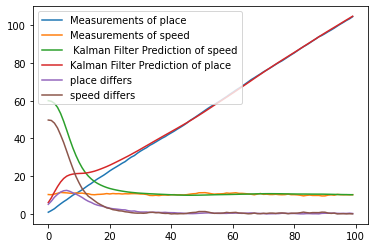

In [254]:
import numpy as np

class KalmanFilter(object):
    def __init__(self, F = None, B = None, H = None, Q = None, R = None, P = None, x0 = [[0.] , [60.]]):

        if(F is None or H is None):
            raise ValueError("Set proper system dynamics.")

        self.n = F.shape[1]
        self.m = H.shape[1]

        self.F = F
        self.H = H
        self.B = 0 if B is None else B
        self.Q = np.eye(self.n) if Q is None else Q
        self.R = np.eye(self.n) if R is None else R
        self.P = np.eye(self.n) if P is None else P
        self.x = np.zeros((self.n, 1)) if x0 is None else x0
        print(self.x , 'self.x =' , len(self.x))

    def predict(self, u = 0 ):
        self.x = np.dot(self.F, self.x) + np.dot(self.B, u)
        self.P = np.dot(np.dot(self.F, self.P), self.F.T) + self.Q
        return self.x 

    def update(self, z):
        y = z - np.dot(self.H, self.x)
        S = self.R + np.dot(self.H, np.dot(self.P, self.H.T))
        K = np.dot(np.dot(self.P, self.H.T), np.linalg.inv(S))
        self.x = self.x + np.dot(K, y)
        I = np.eye(self.n)
        self.P = np.dot(np.dot(I - np.dot(K, self.H), self.P), 
        	(I - np.dot(K, self.H)).T) + np.dot(np.dot(K, self.R), K.T)
def example():
  dt = 0.1
  F = np.array([[1, dt], [0, 1]])
  H = np.array([1, 0]).reshape(1, 2)
  Q = np.array([[0.25 * (dt **4) * 0.5, 0.5 * (dt**3) * 0.5], [ 0.5 * (dt**3) * 0.5 , 0.5*(dt**2)]])
  R = np.array([0.5]).reshape(1, 1)
  newmesuer = [ 0 , 10]
  kf = KalmanFilter(F = F, H = H, Q = Q, R = R)
  predictions_place = []
  predictions_speed = []
  measurementsofplace = []
  measurementsofspeed = []
  noise1 =np.random.normal(0, 0.1, 100)
  print(noise1)
  noise2 = np.random.normal(0, 0.2, 100)
  for k in range(100):
    newmesuer = np.dot(F, newmesuer) + [noise1[k] , noise2[k]]
    print(newmesuer)
    measurementsofplace.append(newmesuer[0])
    measurementsofspeed.append(newmesuer[1])
  

  for z in measurementsofplace:
    a = kf.predict()
    place = a[0][0] 
    speed = a[1]
    predictions_place.append(np.dot(H, a)[0])
    predictions_speed.append(speed)
    kf.update(z)
  difference  = np.abs( measurementsofplace - np.ravel(predictions_place))
  difference2 = np.abs( measurementsofspeed - np.ravel(predictions_speed))
  print( 'PLACE diifer is :' , difference)
  print('speed differ is : ' ,difference2 )
  import matplotlib.pyplot as plt
  plt.plot(range(len(measurementsofplace)), measurementsofplace, label = 'Measurements of place')
  plt.plot(range(len(measurementsofspeed)), measurementsofspeed, label = 'Measurements of speed')
  plt.plot(range(len(predictions_speed)), predictions_speed, label = ' Kalman Filter Prediction of speed')
  plt.plot(range(len(predictions_place)), np.ravel(predictions_place), label = 'Kalman Filter Prediction of place')
  plt.plot(range(len(difference)), difference, label = 'place differs')
  plt.plot(range(len(difference2)), difference2, label = 'speed differs')

  plt.legend()
  plt.show()


if __name__ == '__main__':
    example()